In [1]:
# Import packages
from rl_experiments.inner_chain import InnerChainEnv
from rl_experiments.test import test
from rl_experiments.train import train
from rl_experiments.metrics import visualize
import ray
from ray.rllib.agents.ppo import PPOTrainer, DEFAULT_CONFIG
import gym 
import numpy as np
from gym.spaces import Discrete, Box
import matplotlib.pyplot as plt

In [10]:
# Instatiate environment 
env = InnerChainEnv()

# Test random actions inside custom env
random_agent = test(env)
random_agent

1


In [5]:
# Utilize Ray RLlib 
ray.shutdown()
ray.init(num_cpus=3, log_to_driver=False)

#Instantiate the config file
trainer_config = DEFAULT_CONFIG.copy()


trainer = PPOTrainer(config=trainer_config, env=InnerChainEnv)

2021-11-29 23:58:57,479	INFO trainable.py:106 -- Trainable.setup took 10.174 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-11-29 23:58:57,485	WARNING util.py:55 -- Install gputil for GPU system monitoring.


In [6]:
# Save the max/min/mean reward and the mean length
reward_max, reward_min, reward_mean, length_mean = train(trainer, episodes=20)

Agent Saved


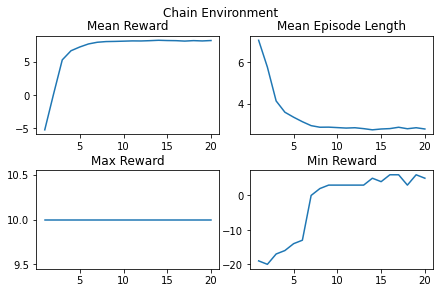

None


In [7]:
# Visualize results
print(visualize(reward_mean, length_mean, reward_max, reward_min))

In [13]:
trainer.restore('C:/Users/young/ray_results/PPO_InnerChainEnv_2021-11-29_23-49-34vvlouqn8/checkpoint_000020/checkpoint-20')

2021-11-29 23:53:26,980	INFO trainable.py:382 -- Restored on 10.0.0.54 from checkpoint: C:/Users/young/ray_results/PPO_InnerChainEnv_2021-11-29_23-49-34vvlouqn8/checkpoint_000020/checkpoint-20
2021-11-29 23:53:26,983	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 121.61845707893372, '_episodes_total': 25649}


In [14]:
# Apply a rollout to your test your agent
ppo_agent = test(env=env, trainer=trainer)

7
